# Importando os dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from math import log

dataset = pd.read_csv("tic-tac-toe-endgame.csv")
dataset.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
5,x,x,x,x,o,o,b,b,o,positive
6,x,x,x,x,o,b,o,o,b,positive
7,x,x,x,x,o,b,o,b,o,positive
8,x,x,x,x,o,b,b,o,o,positive
9,x,x,x,x,b,o,o,o,b,positive


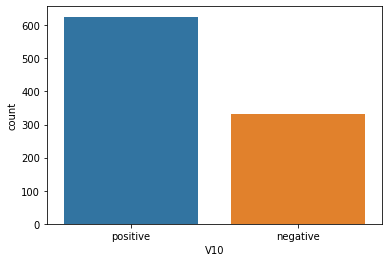

In [ ]:
sns.countplot(x = "V10", data = dataset)

In [ ]:
print(len(dataset.index))

958


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


# Organizando os Dados

In [ ]:
x_num = pd.get_dummies(dataset[['V1','V2','V3','V4','V5','V6','V7','V8','V9']],drop_first = True)

In [ ]:
dataset = pd.concat([x_num, dataset], axis=1)

In [ ]:
dataset.replace('negative',0,inplace=True)
dataset.replace('positive',1,inplace=True)
dataset.head(10)


,V1_o,V1_x,V2_o,V2_x,V3_o,V3_x,V4_o,V4_x,V5_o,V5_x,V6_o,V6_x,V7_o,V7_x,V8_o,V8_x,V9_o,V9_x,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,x,x,x,x,o,o,x,o,o,1
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,x,x,x,x,o,o,o,x,o,1
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,x,x,x,x,o,o,o,o,x,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,x,x,x,x,o,o,o,b,b,1
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,x,x,x,x,o,o,b,o,b,1
5,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,x,x,x,x,o,o,b,b,o,1
6,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,x,x,x,x,o,b,o,o,b,1
7,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,x,x,x,x,o,b,o,b,o,1
8,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,x,x,x,x,o,b,b,o,o,1
9,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,x,x,x,x,b,o,o,o,b,1


In [ ]:
dataset.drop(['V1','V2','V3','V4','V5','V6','V7','V8','V9'], axis =1, inplace = True)
dataset.head(5)

,V1_o,V1_x,V2_o,V2_x,V3_o,V3_x,V4_o,V4_x,V5_o,V5_x,V6_o,V6_x,V7_o,V7_x,V8_o,V8_x,V9_o,V9_x,V10
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1


# Realizando a árvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
print(X)

     V1_o  V1_x  V2_o  V2_x  V3_o  V3_x  ...  V7_o  V7_x  V8_o  V8_x  V9_o  V9_x
0       0     1     0     1     0     1  ...     0     1     1     0     1     0
1       0     1     0     1     0     1  ...     1     0     0     1     1     0
2       0     1     0     1     0     1  ...     1     0     1     0     0     1
3       0     1     0     1     0     1  ...     1     0     0     0     0     0
4       0     1     0     1     0     1  ...     0     0     1     0     0     0
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
953     1     0     0     1     0     1  ...     1     0     0     1     0     1
954     1     0     0     1     1     0  ...     0     1     1     0     0     1
955     1     0     0     1     1     0  ...     0     1     1     0     0     1
956     1     0     0     1     1     0  ...     0     1     1     0     0     1
957     1     0     1     0     0     1  ...     1     0     0     1     0     1

[958 rows x 18 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=1)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9409722222222222


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 91,  13],
       [  4, 180]])

In [ ]:
incorrect_pred = (y_test != y_pred).sum()
incorrect_pred

17

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       104
           1       0.93      0.98      0.95       184

    accuracy                           0.94       288
   macro avg       0.95      0.93      0.93       288
weighted avg       0.94      0.94      0.94       288



# Apresentando a árvore

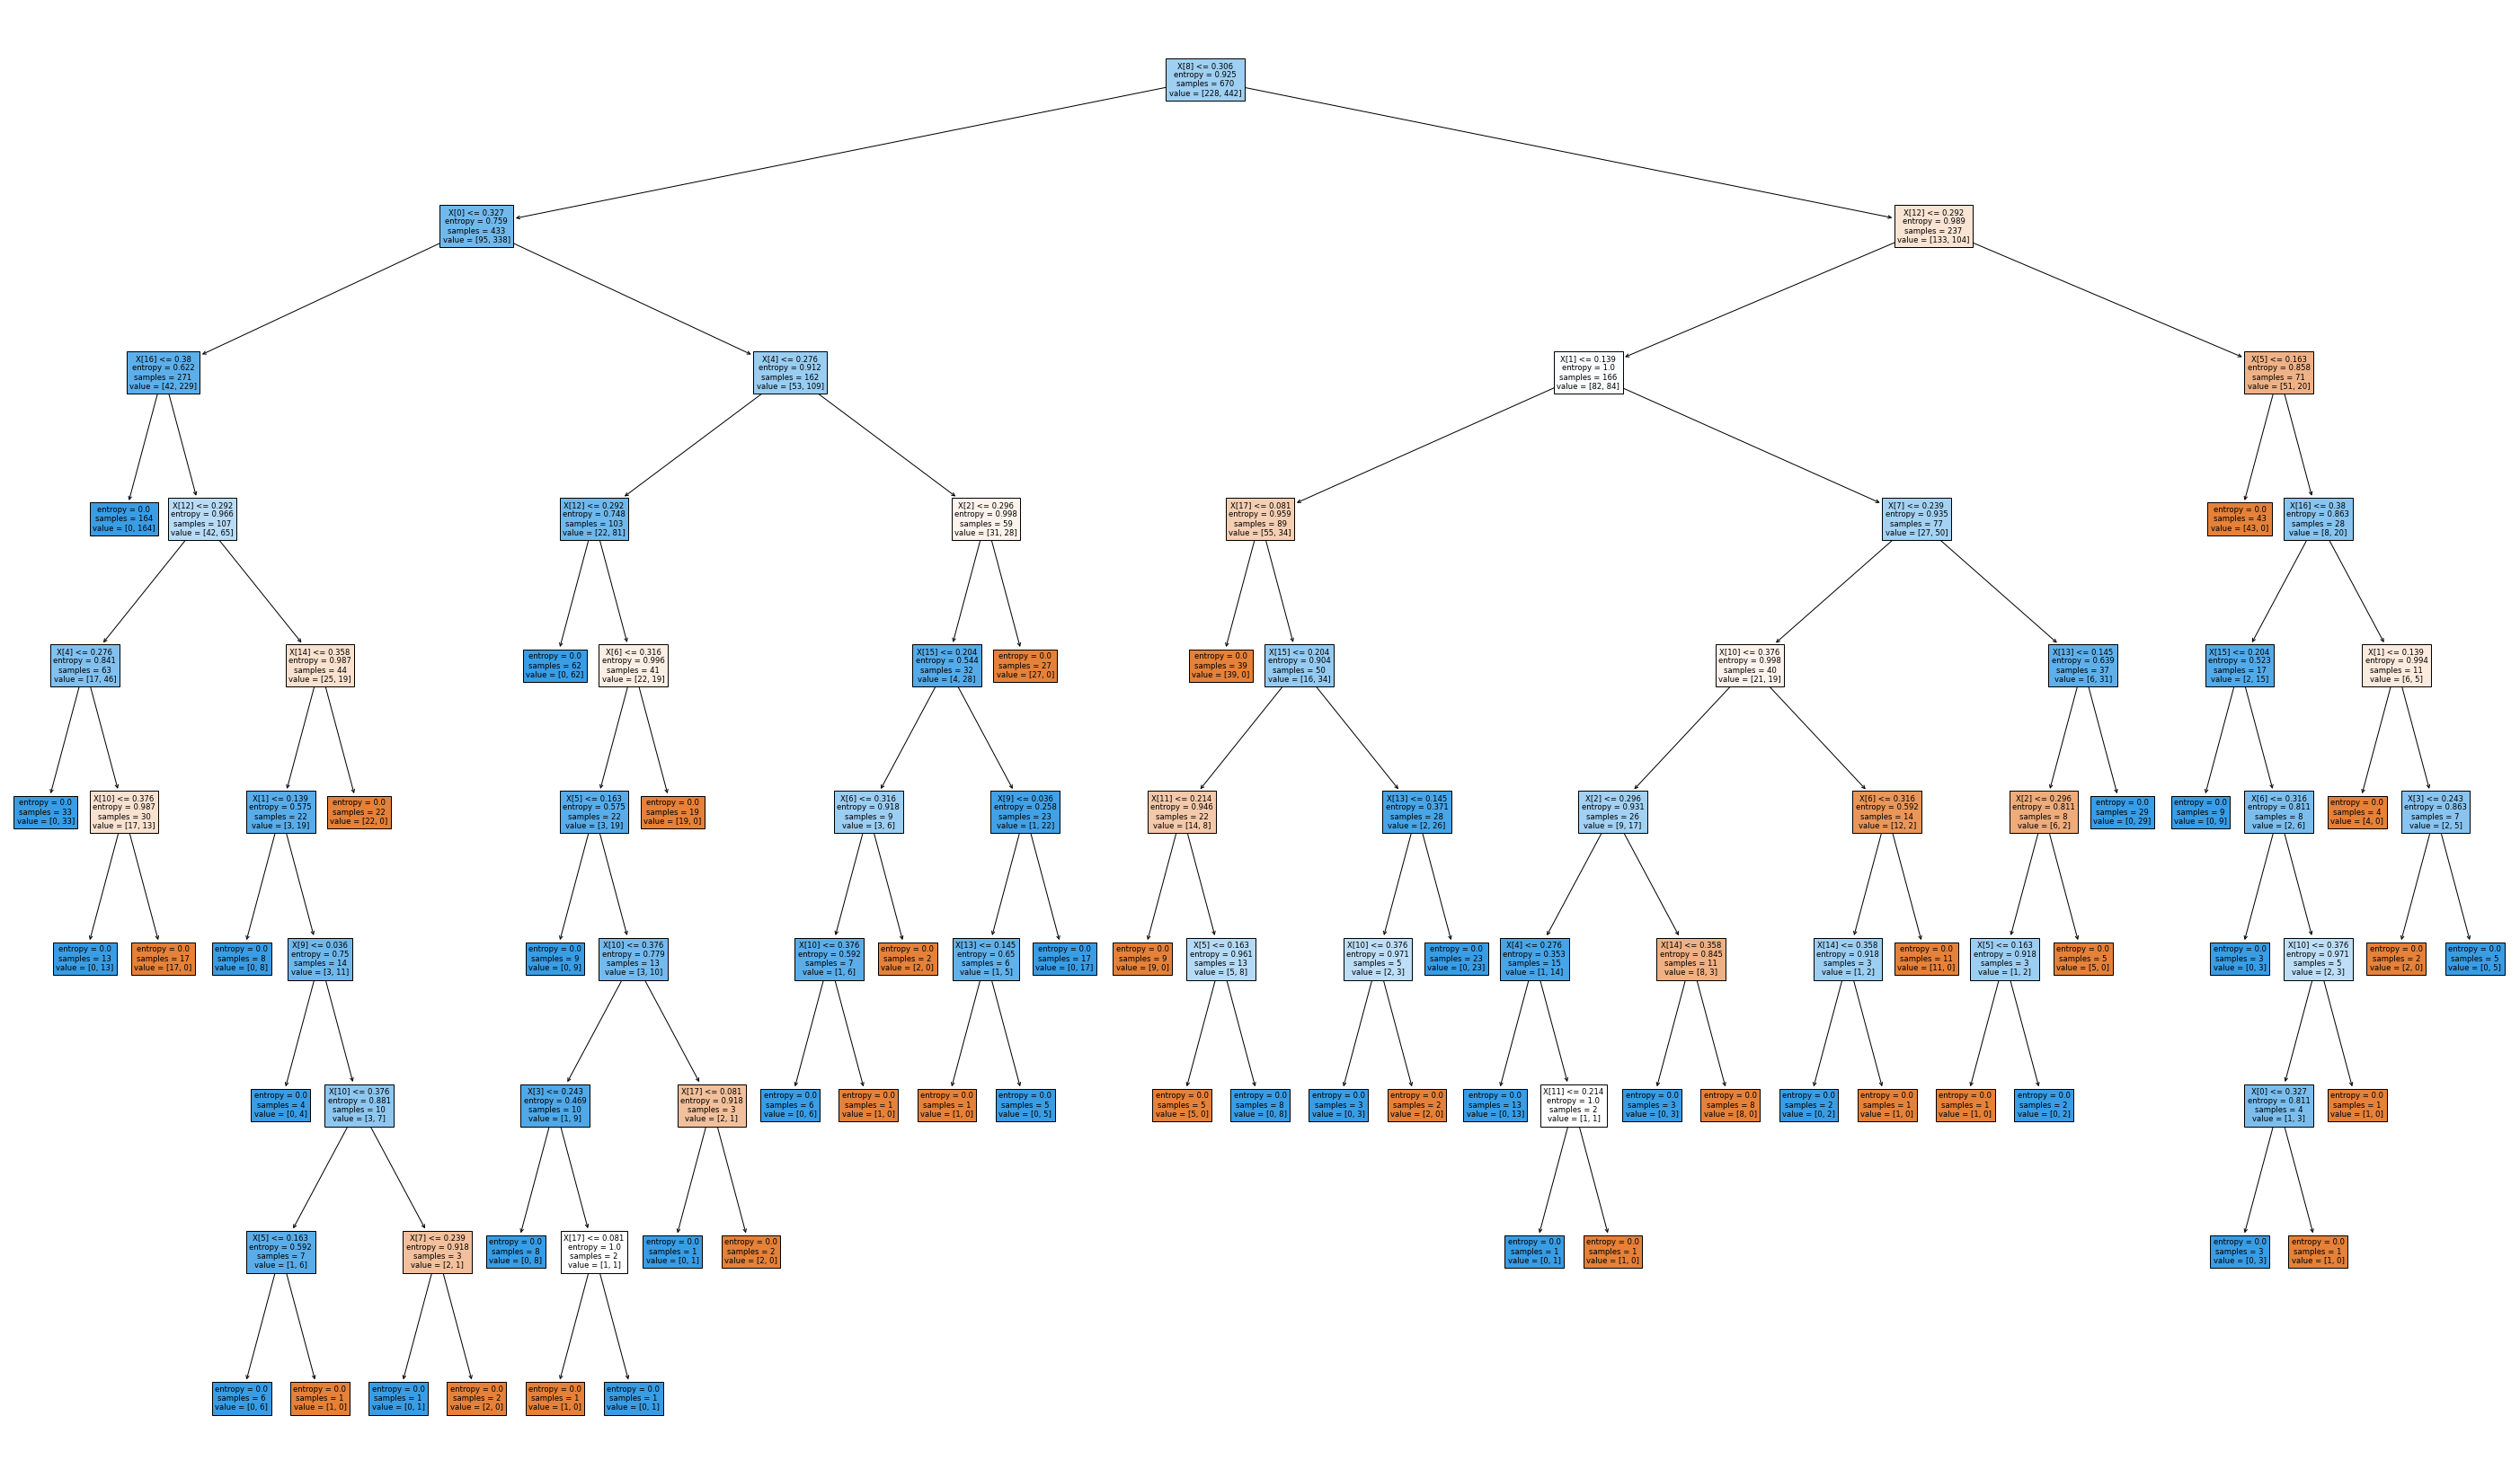

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(clf,filled=True)
plt.show()

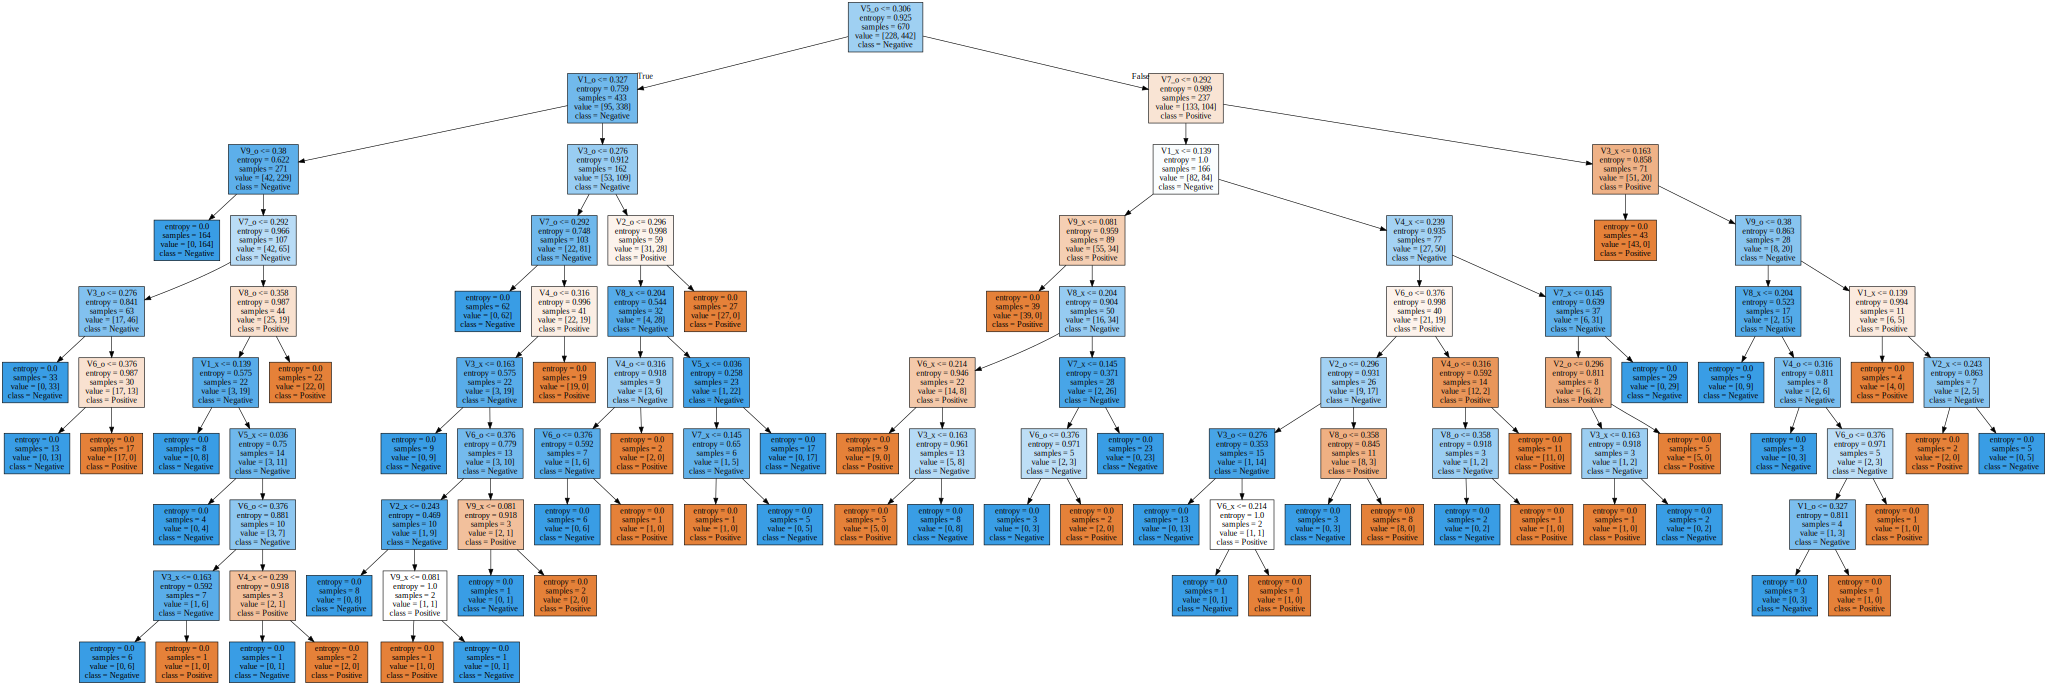

In [ ]:
feature = ['V1_o', 'V1_x', 'V2_o', 'V2_x', 'V3_o', 'V3_x', 'V4_o', 'V4_x', 'V5_o','V5_x', 'V6_o', 'V6_x', 'V7_o', 'V7_x', 'V8_o', 'V8_x', 'V9_o', 'V9_x']
class_name = ['Positive','Negative']
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=feature,class_names=class_name,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph